In [1]:
#optional to ignore run time warnings or errors
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Load Dataset
#Use a public dataset like the COVID-19 dataset from Our World in Data.
import pandas as pd

# Load data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Preview
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
# Preprocessing
# Convert date
df['date'] = pd.to_datetime(df['date'])

# Filter for 2021 onward and selected countries
countries = ['India', 'United States', 'Brazil', 'Germany']
covid = df[df['location'].isin(countries) & (df['date'] >= '2021-01-01')]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

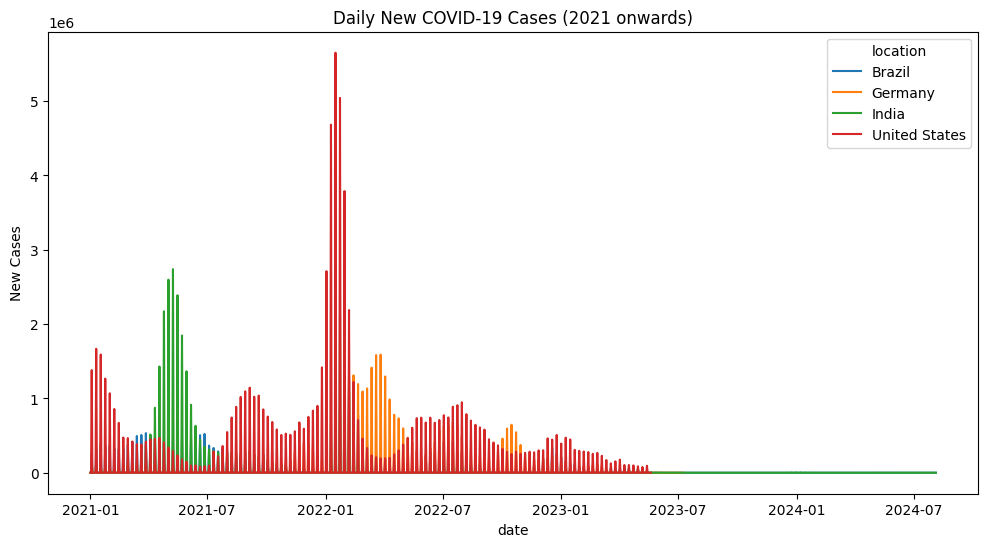

In [3]:
# Visualizations
# New cases over time (line plot)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases (2021 onwards)')
plt.ylabel('New Cases')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

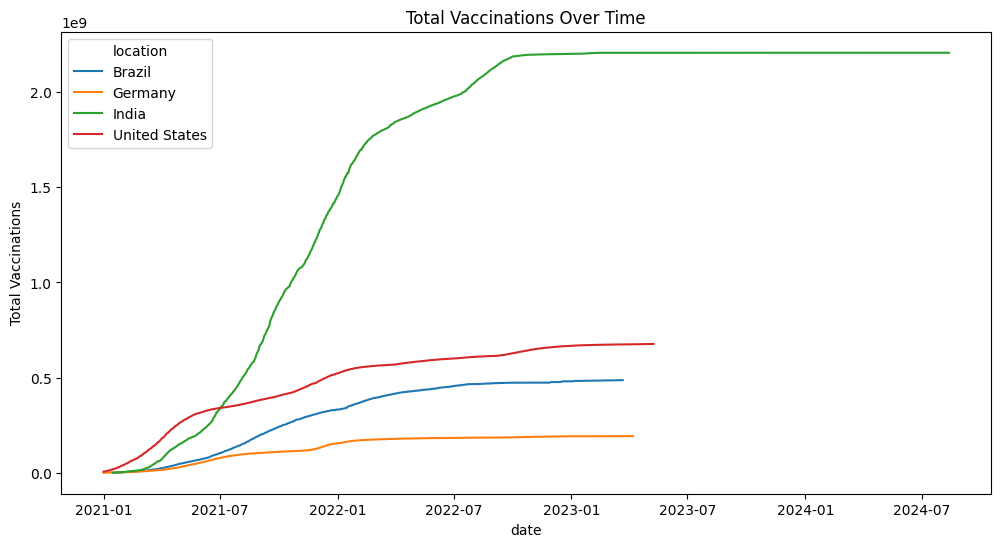

In [4]:
# Total vaccinations (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid, x='date', y='total_vaccinations', hue='location')
plt.title('Total Vaccinations Over Time')
plt.ylabel('Total Vaccinations')
plt.show()


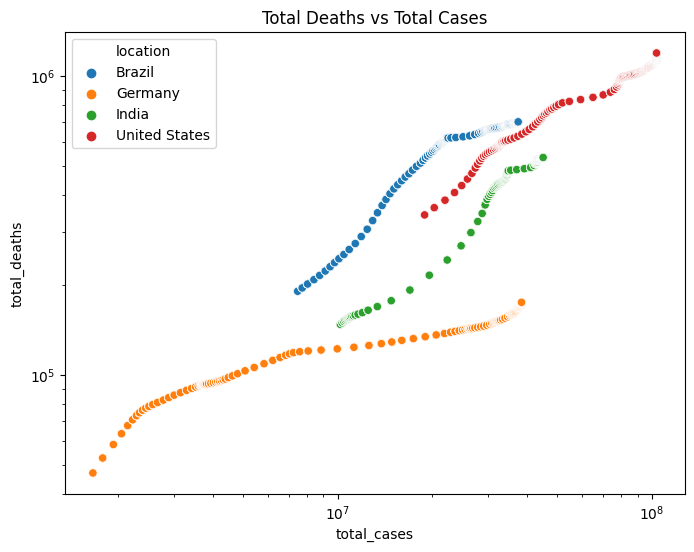

In [5]:
# Deaths vs. Cases (scatter plot)
sample = covid.dropna(subset=['total_deaths', 'total_cases'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample, x='total_cases', y='total_deaths', hue='location')
plt.title('Total Deaths vs Total Cases')
plt.xscale('log')
plt.yscale('log')
plt.show()



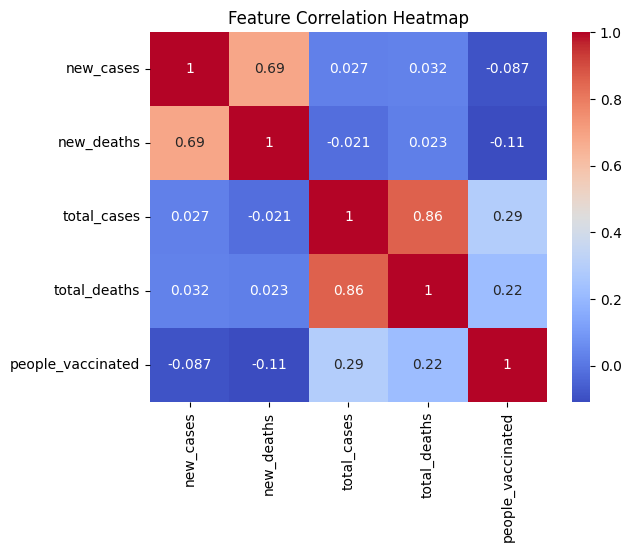

In [6]:
# Heatmap of correlation
subset = covid[['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'people_vaccinated']].dropna()
sns.heatmap(subset.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


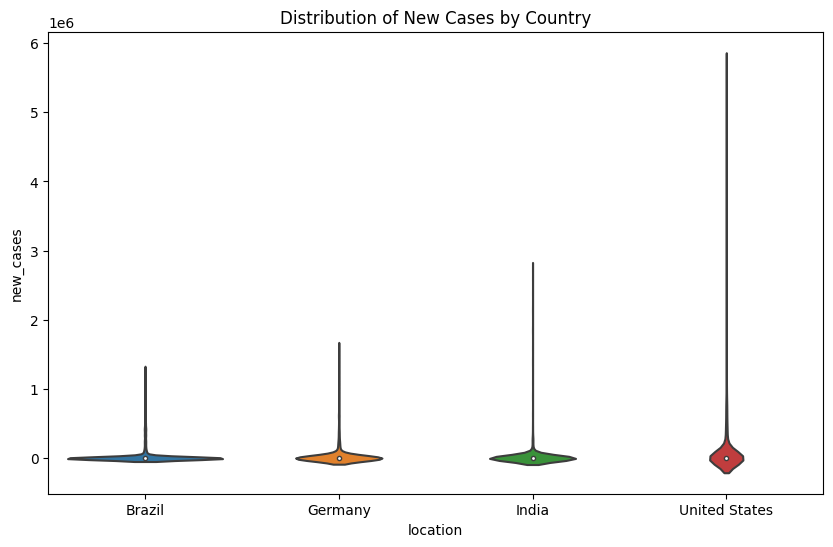

In [7]:
# Violin plot: Daily new cases per country
plt.figure(figsize=(10, 6))
sns.violinplot(data=covid, x='location', y='new_cases')
plt.title('Distribution of New Cases by Country')
plt.show()


/tmp/ipykernel_13/4209707611.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest = covid.groupby('location').apply(lambda x: x[x['date'] == x['date'].max()])


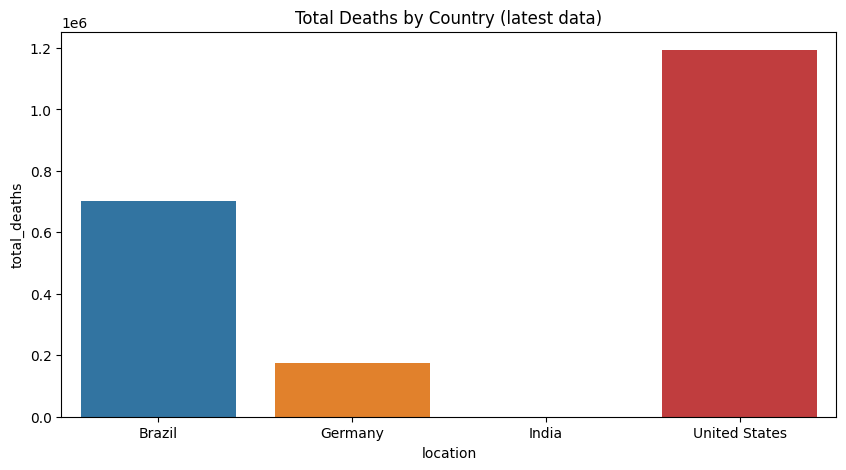

In [8]:
# Bar plot: Total deaths by country (latest date)
latest = covid.groupby('location').apply(lambda x: x[x['date'] == x['date'].max()])
plt.figure(figsize=(10, 5))
sns.barplot(data=latest, x='location', y='total_deaths')
plt.title('Total Deaths by Country (latest data)')
plt.show()
